In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.targets 
  
# metadata 
print(occupancy_detection.metadata) 
  
# variable information 
print(occupancy_detection.variables) 


{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 470, 'type': 'NATIVE', 'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2

In [42]:
X.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518


In [43]:
y.head()

,Occupancy
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           20562 non-null  object
 1   Temperature    20562 non-null  object
 2   Humidity       20562 non-null  object
 3   Light          20562 non-null  object
 4   CO2            20562 non-null  object
 5   HumidityRatio  20562 non-null  object
dtypes: object(6)
memory usage: 964.0+ KB


In [45]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Occupancy  20560 non-null  float64
dtypes: float64(1)
memory usage: 160.8 KB


In [46]:
# Dropping ID and Date
X = X.drop('date', axis=1)

In [47]:
print(X.describe())
print(y.describe())

       Temperature Humidity  Light    CO2        HumidityRatio
count        20562    20562  20562  20562                20562
unique         486     2481   1906   5168                 9690
top          20.39    30.39      0    439  0.00484624668845129
freq          1050      267  12772    139                   87
          Occupancy
count  20560.000000
mean       0.231031
std        0.421503
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [48]:
y.isnull().sum()

Occupancy    2
dtype: int64

In [49]:
np.where(y.isnull())

(array([ 8143, 10809]), array([0, 0]))

In [50]:
y.loc[[8143, 10809]]

,Occupancy
8143,NaN
10809,NaN


In [51]:
y = y.dropna()

In [52]:
#dropping corresponding X values
X = X.drop([8143, 10809])

## Basic EDA

In [53]:
print(len(X))
print(len(y))

20560
20560


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 0 to 20561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Temperature    20560 non-null  object
 1   Humidity       20560 non-null  object
 2   Light          20560 non-null  object
 3   CO2            20560 non-null  object
 4   HumidityRatio  20560 non-null  object
dtypes: object(5)
memory usage: 963.8+ KB


In [55]:
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 0 to 20561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
dtypes: float64(5)
memory usage: 963.8 KB


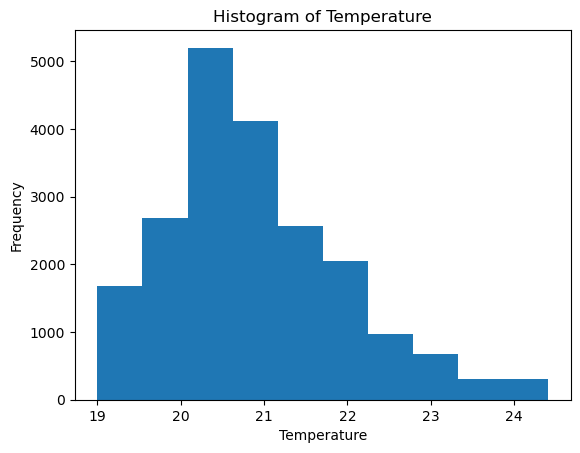

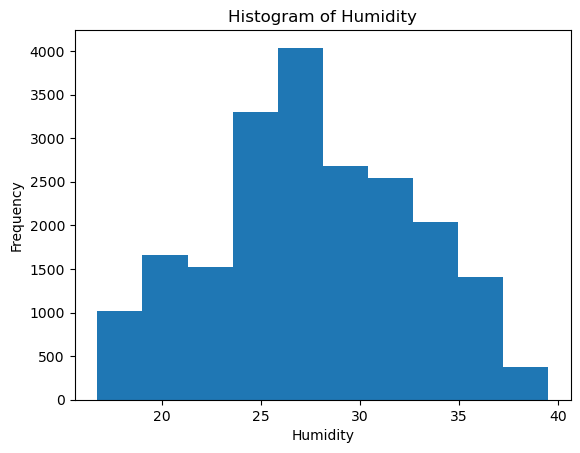

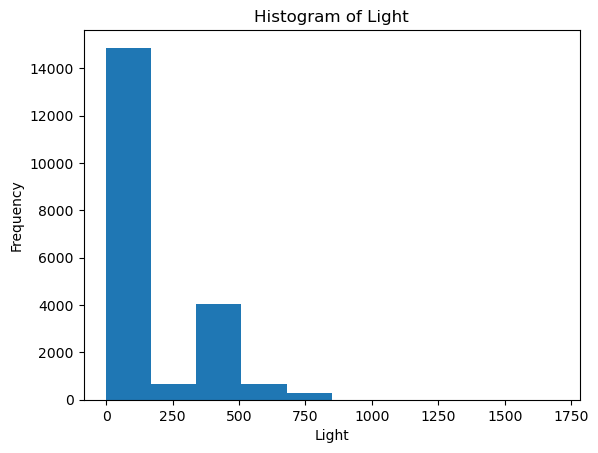

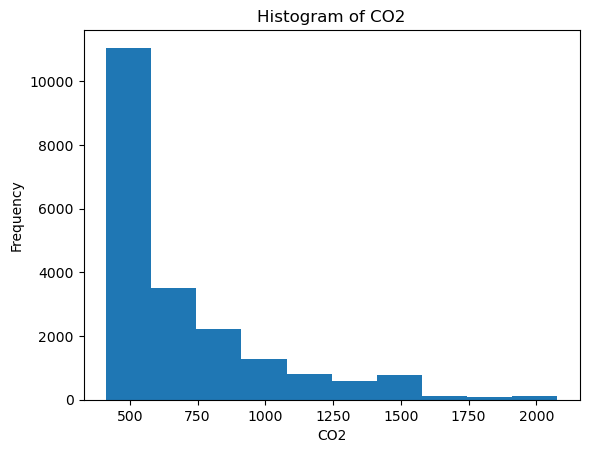

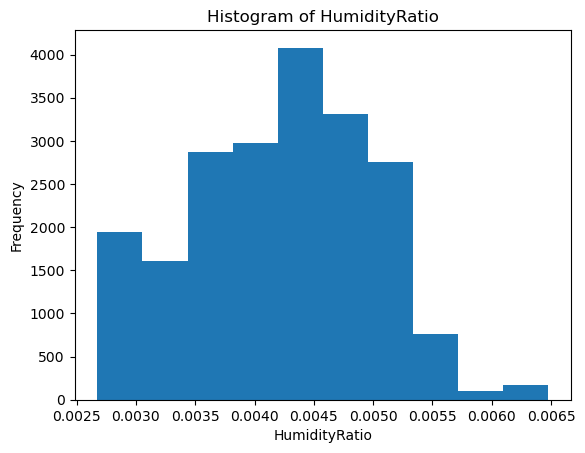

In [56]:
for col in X.columns: 
    plt.figure()
    plt.hist(X[col], bins = 10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

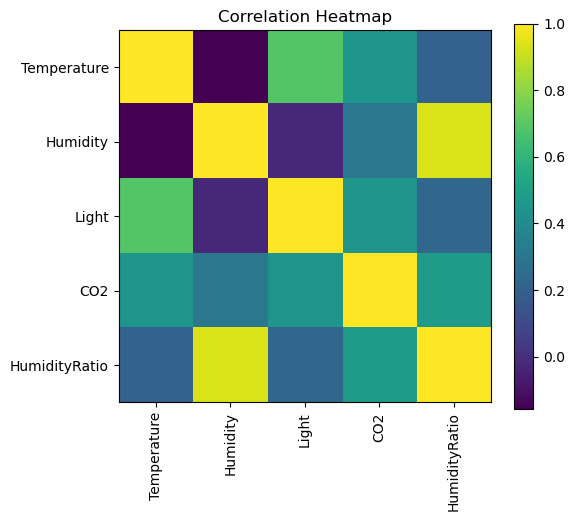

In [57]:
plt.figure(figsize=(6,5))
corr = X.corr()
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

In [58]:
print(y.shape)
print(X.shape)

(20560, 1)
(20560, 5)


In [59]:
y = y.squeeze()

In [60]:
for col in X.columns:
    corr_value = X[col].corr(y)
    print(f"Correlation between {col} and Occupancy: {corr_value}")


Correlation between Temperature and Occupancy: 0.555610014897269
Correlation between Humidity and Occupancy: 0.04623991433405179
Correlation between Light and Occupancy: 0.914849764235252
Correlation between CO2 and Occupancy: 0.5015822358875021
Correlation between HumidityRatio and Occupancy: 0.2573238095020792


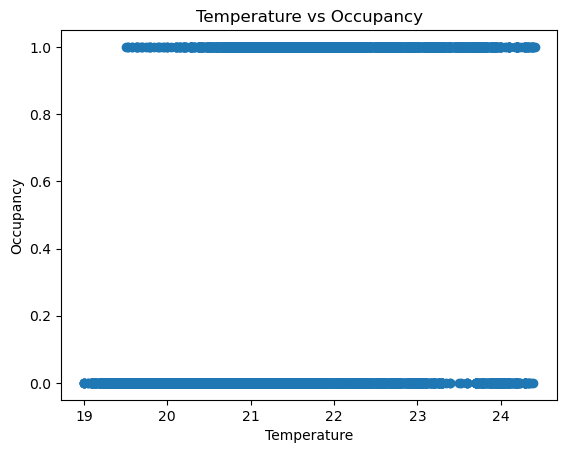

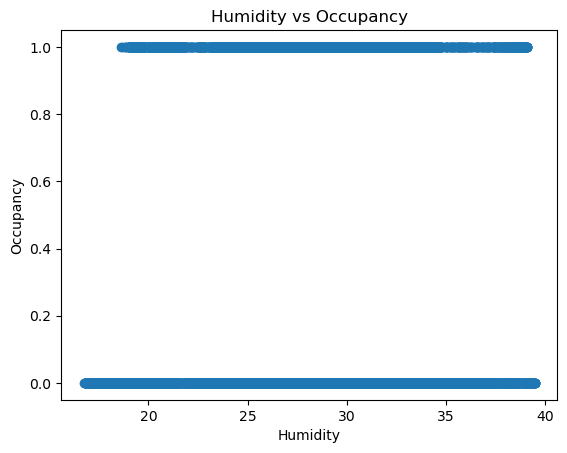

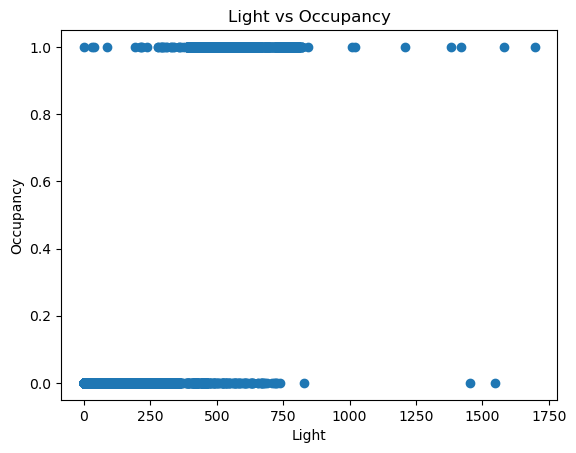

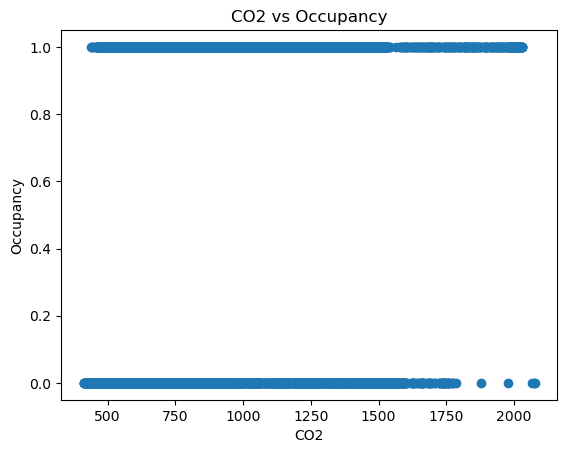

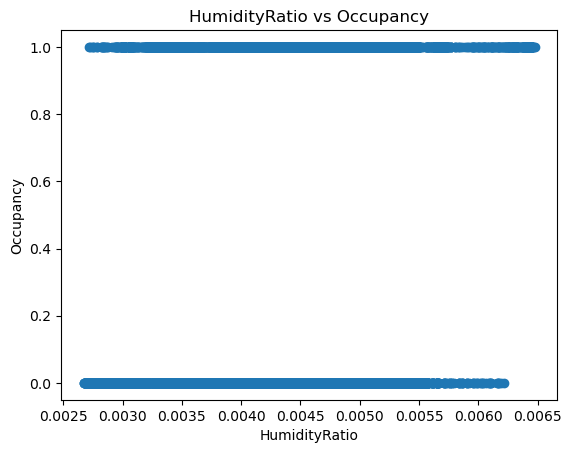

In [61]:
for col in X.columns:
    plt.figure()
    plt.scatter(X[col], y)
    plt.title(f"{col} vs Occupancy")
    plt.xlabel(col)
    plt.ylabel("Occupancy")
    plt.show()

## Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
def evaluate_model(model, X_train, X_test, y_train, y_test, scaled=False):
    if scaled:
        Xtr, Xte = X_train, X_test
    else:
        Xtr, Xte = X_train, X_test

    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)
    y_probs = model.predict_proba(Xte)[:, 1]  

    acc = accuracy_score(y_test, y_pred)

    print("="*50)
    print(model.__class__.__name__)
    print("Accuracy:", acc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return acc, y_probs


In [64]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), True),
    "KNN": (KNeighborsClassifier(n_neighbors=5), True),
    "Decision Tree": (DecisionTreeClassifier(max_depth=5, random_state=42), False),
    "Random Forest": (RandomForestClassifier(n_estimators=200, random_state=42), False),
    "Gradient Boosting": (GradientBoostingClassifier(), False),
}

results = {}
roc_probabilities = {}

for name, (model, scaled) in models.items():
    acc, probs = evaluate_model(model, X_train, X_test, y_train, y_test, scaled)
    results[name] = acc
    roc_probabilities[name] = probs


LogisticRegression
Accuracy: 0.9897859922178989

Confusion Matrix:
 [[3143   39]
 [   3  927]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3182
         1.0       0.96      1.00      0.98       930

    accuracy                           0.99      4112
   macro avg       0.98      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112

KNeighborsClassifier
Accuracy: 0.9912451361867705

Confusion Matrix:
 [[3154   28]
 [   8  922]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3182
         1.0       0.97      0.99      0.98       930

    accuracy                           0.99      4112
   macro avg       0.98      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112

DecisionTreeClassifier
Accuracy: 0.9897859922178989

Confusion Matrix:
 [[3144   38]
 [   4  926]]

Clas

In [65]:
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
print("\n Model Accuracy Comparison \n")
print(results_df)


 Model Accuracy Comparison 

                     Accuracy
Logistic Regression  0.989786
KNN                  0.991245
Decision Tree        0.989786
Random Forest        0.993191
Gradient Boosting    0.990272


## ROC Curves

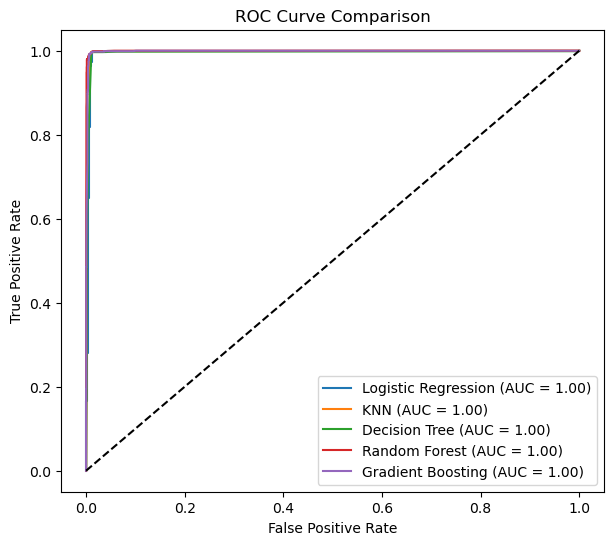

In [66]:
plt.figure(figsize=(7,6))

for name, probs in roc_probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## Cross Validation Scores

In [67]:
print("\n Cross-Validation Scores \n")
for name, (model, scaled) in models.items():
    Xcv = X_train_scaled if scaled else X_train
    cv_scores = cross_val_score(model, Xcv, y_train, cv=5)
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean():.4f}")



 Cross-Validation Scores 

Logistic Regression: Mean CV Accuracy = 0.9888
KNN: Mean CV Accuracy = 0.9922
Decision Tree: Mean CV Accuracy = 0.9891
Random Forest: Mean CV Accuracy = 0.9927
Gradient Boosting: Mean CV Accuracy = 0.9895


## Hyperparameter Tuning

In [68]:
lr_params = {
    "C": np.logspace(-3, 3, 20),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

lr_search = RandomizedSearchCV(
    LogisticRegression(),
    lr_params,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42
)
lr_search.fit(X_train_scaled, y_train)
print("\nBest Logistic Regression Params:", lr_search.best_params_)



Best Logistic Regression Params: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.07847599703514611)}


In [69]:
rf_params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_params,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42
)
rf_search.fit(X_train, y_train)
print("\nBest Random Forest Params:", rf_search.best_params_)



Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


In [70]:
gb_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100,200,300],
    "max_depth": [2,3,4]
}

gb_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    gb_params,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42
)
gb_search.fit(X_train, y_train)
print("\nBest Gradient Boosting Params:", gb_search.best_params_)



Best Gradient Boosting Params: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
